<a href="https://colab.research.google.com/github/ganesh-sanam/Energy-Detuction/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/data set/Energy_Theft_Detection.csv')
df.head()

,Customer_ID,Age,Energy_Consumption,Location,Time_of_Use,Previous_Bills,Average_Temperature,Energy_Usage_History,Payment_Method,Consumption_Type
0,349674fd-7878-4927-9b5e-a99ec45cb77e,38,805.0,Suburban,Night,263.0,16.869353,Abnormal,Debit Card,Residential
1,3427bdd4-d1f7-44a6-99c4-8735eb81d8a7,38,721.0,Rural,Day,278.0,15.727896,Abnormal,Cash,Residential
2,97a417eb-8559-491e-88d0-dc8c6e7b6711,41,391.0,Urban,Day,199.0,25.542912,Abnormal,Credit Card,Residential
3,e2595c2f-920d-4117-a92e-0266ed8fdfb0,30,154.0,Urban,Day,242.0,34.635084,Normal,Debit Card,Commercial
4,243ee6de-7424-41ef-89c2-42065d05ac15,31,545.0,Rural,Day,499.0,16.864784,Abnormal,Debit Card,Residential


In [ ]:
# See the no. of rows and columns
df.shape

(1050, 10)

In [ ]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Customer_ID', 'Age', 'Energy_Consumption', 'Location', 'Time_of_Use', 'Previous_Bills', 'Average_Temperature', 'Energy_Usage_History', 'Payment_Method', 'Consumption_Type']


In [ ]:
# Display data type of each feature
df.dtypes

,0
Customer_ID,object
Age,int64
Energy_Consumption,float64
Location,object
Time_of_Use,object
Previous_Bills,float64
Average_Temperature,float64
Energy_Usage_History,object
Payment_Method,object
Consumption_Type,object


In [ ]:
df.describe()

,Age,Energy_Consumption,Previous_Bills,Average_Temperature
count,1050.000000,1008.000000,1018.000000,1040.000000
mean,47.824762,555.231151,263.918468,24.938662
std,17.614064,257.223038,130.103220,5.723960
min,18.000000,100.000000,50.000000,15.003251
25%,34.000000,332.750000,149.000000,20.080359
50%,47.000000,559.500000,265.000000,24.975350
75%,63.000000,781.250000,375.000000,29.739189
max,79.000000,999.000000,499.000000,34.973531


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           1050 non-null   object 
 1   Age                   1050 non-null   int64  
 2   Energy_Consumption    1008 non-null   float64
 3   Location              1050 non-null   object 
 4   Time_of_Use           1050 non-null   object 
 5   Previous_Bills        1018 non-null   float64
 6   Average_Temperature   1040 non-null   float64
 7   Energy_Usage_History  1050 non-null   object 
 8   Payment_Method        1050 non-null   object 
 9   Consumption_Type      1050 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 82.2+ KB


In [ ]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Age,0
Energy_Consumption,42
Location,0
Time_of_Use,0
Previous_Bills,32
Average_Temperature,10
Energy_Usage_History,0
Payment_Method,0
Consumption_Type,0


In [ ]:
# Remove unwanted columns
df.drop(columns=['Customer_ID'], inplace=True)  # specify the columns to remove
df.head()

      Age  Energy_Consumption  Location Time_of_Use  Previous_Bills  \
0      38               805.0  Suburban       Night           263.0   
1      38               721.0     Rural         Day           278.0   
2      41               391.0     Urban         Day           199.0   
3      30               154.0     Urban         Day           242.0   
4      31               545.0     Rural         Day           499.0   
...   ...                 ...       ...         ...             ...   
1045   44               666.0  Suburban         Day            98.0   
1046   43               744.0     Urban         Day           140.0   
1047   53               187.0     Rural         Day           278.0   
1048   44               726.0  Suburban       Night           176.0   
1049   62               993.0     Urban         Day           386.0   

      Average_Temperature Energy_Usage_History Payment_Method Consumption_Type  
0               16.869353             Abnormal     Debit Card     

In [ ]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
print(num_columns)
print(cat_columns)

Index(['Age', 'Energy_Consumption', 'Previous_Bills', 'Average_Temperature'], dtype='object')
Index(['Location', 'Time_of_Use', 'Energy_Usage_History', 'Payment_Method',
       'Consumption_Type'],
      dtype='object')


In [ ]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns
print(df[num_columns])
print(df[cat_columns])

      Age  Energy_Consumption  Previous_Bills  Average_Temperature
0      38               805.0           263.0            16.869353
1      38               721.0           278.0            15.727896
2      41               391.0           199.0            25.542912
3      30               154.0           242.0            34.635084
4      31               545.0           499.0            16.864784
...   ...                 ...             ...                  ...
1045   44               666.0            98.0            20.807316
1046   43               744.0           140.0            32.890807
1047   53               187.0           278.0            27.669827
1048   44               726.0           176.0            16.102613
1049   62               993.0           386.0            33.604519

[1050 rows x 4 columns]
      Location Time_of_Use Energy_Usage_History Payment_Method  \
0     Suburban       Night             Abnormal     Debit Card   
1        Rural         Day             

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [ ]:
# find the null values
df.isnull().sum()

,0
Age,0
Energy_Consumption,0
Location,0
Time_of_Use,0
Previous_Bills,0
Average_Temperature,0
Energy_Usage_History,0
Payment_Method,0
Consumption_Type,0


In [ ]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Age,Energy_Consumption,Location,Time_of_Use,Previous_Bills,Average_Temperature,Energy_Usage_History,Payment_Method,Consumption_Type
0,38,805.0,1,1,263.0,16.869353,0,2,1
1,38,721.0,0,0,278.0,15.727896,0,0,1
2,41,391.0,2,0,199.0,25.542912,0,1,1
3,30,154.0,2,0,242.0,34.635084,1,2,0
4,31,545.0,0,0,499.0,16.864784,0,2,1


In [ ]:
df.tail()

,Age,Energy_Consumption,Location,Time_of_Use,Previous_Bills,Average_Temperature,Energy_Usage_History,Payment_Method,Consumption_Type
1045,44,666.0,1,0,98.0,20.807316,1,1,0
1046,43,744.0,2,0,140.0,32.890807,1,0,0
1047,53,187.0,0,0,278.0,27.669827,0,1,1
1048,44,726.0,1,1,176.0,16.102613,0,1,0
1049,62,993.0,2,0,386.0,33.604519,1,0,1


In [ ]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])
df.head()


,Age,Energy_Consumption,Location,Time_of_Use,Previous_Bills,Average_Temperature,Energy_Usage_History,Payment_Method,Consumption_Type
0,0.327869,0.784205,1,1,0.474388,0.093444,0,2,1
1,0.327869,0.690768,0,0,0.507795,0.036286,0,0,1
2,0.377049,0.323693,2,0,0.331849,0.527767,0,1,1
3,0.196721,0.060067,2,0,0.427617,0.983052,1,2,0
4,0.213115,0.494994,0,0,1.000000,0.093215,0,2,1


In [ ]:
df.tail()

,Age,Energy_Consumption,Location,Time_of_Use,Previous_Bills,Average_Temperature,Energy_Usage_History,Payment_Method,Consumption_Type
1045,0.426230,0.629588,1,0,0.106904,0.290635,1,1,0
1046,0.409836,0.716352,2,0,0.200445,0.895709,1,0,0
1047,0.573770,0.096774,0,0,0.507795,0.634271,0,1,1
1048,0.426230,0.696329,1,1,0.280624,0.055050,0,1,0
1049,0.721311,0.993326,2,0,0.748330,0.931448,1,0,1


In [ ]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Energy_Usage_History', axis=1)  # -- independent variable
y = df['Energy_Usage_History'] # -- dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

In [ ]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [ ]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.5333333333333333
Logistic Regression Confusion Matrix:
 [[56 46]
 [52 56]]


In [ ]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [ ]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.49047619047619045
Random Forest Confusion Matrix:
 [[52 50]
 [57 51]]


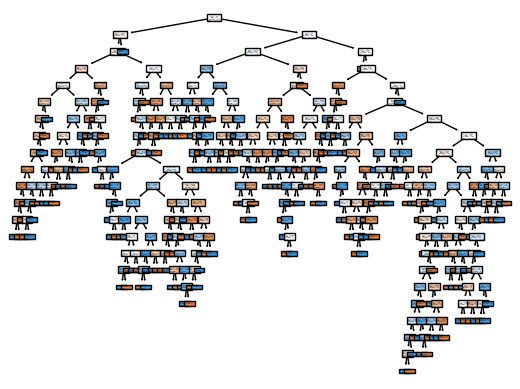

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [ ]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [ ]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
